## Datensatz für Filialen

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lass uns zunächst die Daten aus der Datei `store.csv` anschauen:

In [24]:
stores_df = pd.read_csv('store.csv')
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [25]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Bedeutung der Variablen:  
- Store: Eine eindeutige ID für jede Filiale.
- StoreType: Unterscheidet zwischen vier verschiedenen Ladenmodellen (a, b, c, d).
- Assortment: Beschreibt einen Sortimentsgrad (a = Basis, b = Extra, c = Erweitert).
- CompetitionDistance: Ist die Entfernung in Metern zum nächstgelegenen Konkurrenzgeschäft.
- CompetitionOpenSince[Month/Year]: Gibt das ungefähre Jahr und den Monat der Eröffnung des nächsten Konkurrenten an.
- Promo2: Ist eine fortlaufende und aufeinanderfolgende Werbeaktion für einige Geschäfte (0 = Geschäft nimmt nicht teil, 1 = Geschäft nimmt teil).
- Promo2Since[Week/Year]: Beschreibt das Jahr und die Kalenderwoche, in der das Geschäft an Promo2 teilgenommen hat
- PromoInterval: Beschreibt die aufeinanderfolgenden Intervalle, in denen Promo2 gestartet wird, indem die Monate benannt werden, in denen die Werbeaktionen neu gestartet werden. Zum Beispiel bedeutet "Feb, May, Aug, Nov", dass jede Runde im Februar, Mai, August, November eines jeden Jahres für diesen Laden startet.

Die Variablen `CompetitionDistance`, `CompetitionOpenSince[Month/Year]` und `CompetitionOpenSince[Month/Year]` haben fehlende Werte.

#### Behandlung der fellenden Werte 
Zunächst schauen wir uns die deskriptive Statistiken für diesen Datensatz an:

In [26]:
stores_df.drop('Store', axis=1).describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


##### CompetitionDistance  
Wie sehen die Filialen aus, für welche es keinen Wert für die Variable `CompetitionDistance` gibt?

In [27]:
stores_df[stores_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Wie sieht die Verteilung von CompetitionDistance aus?

[Text(0.5, 1.0, 'Verteilung von CompetitionDistance')]

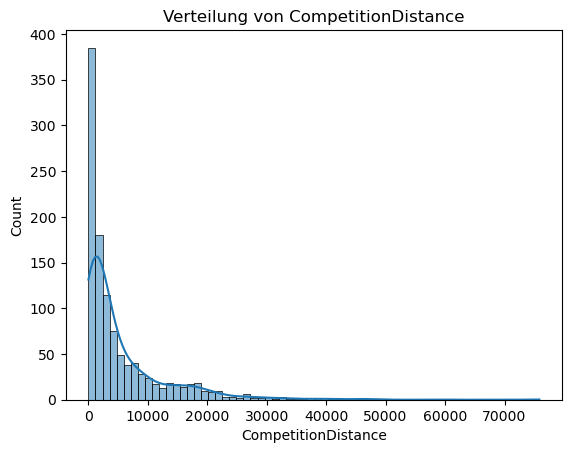

In [28]:
sns.histplot(stores_df['CompetitionDistance'], kde=True).set(title="Verteilung von CompetitionDistance")

Gibt es einen Zusammenhang zwischen der Entfernung der Wettbewerber und dem FilialTyp oder dem Sortiment?

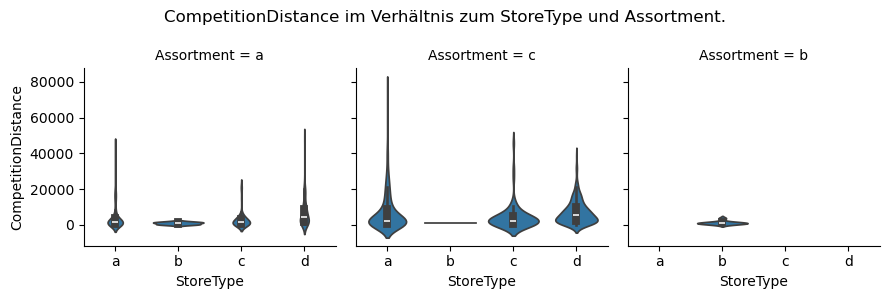

In [29]:
g=sns.FacetGrid(stores_df, col='Assortment', margin_titles=True)
g.map(sns.violinplot, 'StoreType', 'CompetitionDistance', order=['a', 'b', 'c', 'd'])
g.fig.suptitle('CompetitionDistance im Verhältnis zum StoreType und Assortment.')
plt.tight_layout()

Da die Verteilung von CompetitionDistance schief ist, werde ich ihre fehlenden Werte durch den Median in den entsprechenden (Assortment, StoreType)-Gruppen ersetzen in der Hoffnung, so wenig Verzerrung wie möglich einzuführen:

In [30]:
stores_by_type_assort = stores_df.groupby(['StoreType', 'Assortment'])

stores_df['CompetitionDistance'] = stores_df['CompetitionDistance'].fillna(
    stores_by_type_assort['CompetitionDistance'].transform('median'))

stores_df['CompetitionDistance'].isna().sum()

0

##### CompetitionOpenSince[Month/Year]

Zunächst führen wir `CompetitionOpenSinceYear` und `CompetitionOpenSinceMonth` zu einer neuen Spalte namens `CompetitionOpenSince` vom Typ datetime zusammen und entfernen danach die urspünglichen Spalten.

In [31]:
# help function to combine year and month to a datetime
def year_month_to_datetime(year_month):
    year = year_month.iloc[0]
    month = year_month.iloc[1]
    try:
        date = '{}-{}'.format(int(year), int(month))
        return pd.to_datetime(date)
    except:
        return np.nan

In [32]:
stores_df['CompetitionOpenSince'] = stores_df[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']].apply(year_month_to_datetime, axis=1)
stores_df.drop(['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'], axis=1, inplace= True)
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince
0,1,c,a,1270.0,0,NaN,NaN,NaN,2008-09-01
1,2,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2007-11-01
2,3,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2006-12-01
3,4,c,c,620.0,0,NaN,NaN,NaN,2009-09-01
4,5,a,a,29910.0,0,NaN,NaN,NaN,2015-04-01


[Text(0.5, 1.0, 'Verteilung von CompetitionOpenSince')]

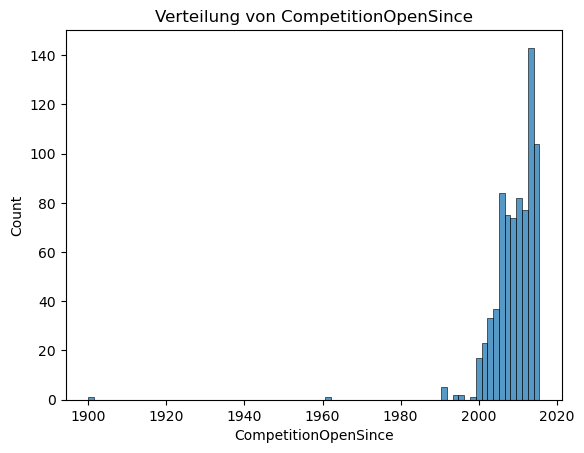

In [33]:
sns.histplot(data=stores_df, x='CompetitionOpenSince').set(title='Verteilung von CompetitionOpenSince')  

Wir stellen fest, dass die Verteilung von CompetitionOpenSince asymmetrisch ist und es Ausreißer gibt.
Es gibt (Assortment, StoreType)-Gruppen, in denen kein Punkt einen Wert für die Variable WettbewerbSeit hat (weil sie auch keine Werte für die Variable WettbewerbSeit[Monat/Jahr] hatten), und daher der gruppeninterne Median nicht definiert werden kann:

In [34]:
stores_by_type_assort = stores_df.groupby(['StoreType', 'Assortment'])

stores_by_type_assort['CompetitionOpenSince'].transform('median').isna().sum()

10

Von daher füllen wir die fehlenden Werte mit dem globalen Median auf:

In [35]:
stores_df['CompetitionOpenSince'] = stores_df['CompetitionOpenSince'].fillna(stores_df['CompetitionOpenSince'].median())
stores_df['CompetitionOpenSince'].isnull().sum()

0

##### Variablen, die mit Promo2 zusammenhängen

Es gibt keine Filiale mit `Promo2` gleich 1, für die es keinen Wert für `Promo2Since[Week\Year]`, oder `PromoInterval` gibt:

In [36]:
stores_promo_df = stores_df[stores_df['Promo2'] == 1]
stores_promo_df.isnull().sum()

Store                   0
StoreType               0
Assortment              0
CompetitionDistance     0
Promo2                  0
Promo2SinceWeek         0
Promo2SinceYear         0
PromoInterval           0
CompetitionOpenSince    0
dtype: int64

Ähnlich wie bei CompetitionOpenSince[Month/Year] kodieren wir Promo2Since[Week/Year] in einer einzigen Promo2Since-Variablen vom Typ datetime.

In [37]:
from datetime import datetime

# help function to combine week and year to a datetime
def week_year_to_datetime(week_year):
    week = week_year.iloc[0]
    year = week_year.iloc[1]
    try:
        # Monday of the corresponding week
        date = datetime.strptime('{}-{}-1'.format(int(year), int(week)), "%Y-%W-%w")
        return pd.to_datetime(date)
    except:
        return np.nan

In [38]:
stores_df['Promo2Since'] = stores_df[['Promo2SinceWeek', 'Promo2SinceYear']].apply(week_year_to_datetime, axis=1)
stores_df.drop(['Promo2SinceWeek', 'Promo2SinceYear'], axis=1, inplace= True)
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,CompetitionOpenSince,Promo2Since
0,1,c,a,1270.0,0,NaN,2008-09-01,NaT
1,2,a,a,570.0,1,"Jan,Apr,Jul,Oct",2007-11-01,2010-03-29
2,3,a,a,14130.0,1,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-04
3,4,c,c,620.0,0,NaN,2009-09-01,NaT
4,5,a,a,29910.0,0,NaN,2015-04-01,NaT


##### Kodierung der kategorischen Variablen

Für `StoreType` verwenden wir One-Hot Kodierung:

In [39]:
stores_df = pd.get_dummies(stores_df, columns=['StoreType'], dtype='int')
stores_df.head()

,Store,Assortment,CompetitionDistance,Promo2,PromoInterval,CompetitionOpenSince,Promo2Since,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,1,a,1270.0,0,NaN,2008-09-01,NaT,0,0,1,0
1,2,a,570.0,1,"Jan,Apr,Jul,Oct",2007-11-01,2010-03-29,1,0,0,0
2,3,a,14130.0,1,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-04,1,0,0,0
3,4,c,620.0,0,NaN,2009-09-01,NaT,0,0,1,0
4,5,a,29910.0,0,NaN,2015-04-01,NaT,1,0,0,0


In [ ]:
Da `Assortment` einen gewissen ordinalen Charakter hat, kodierten wir `a`->0, `b`->1, `c`->2:

In [43]:
def code_assortment(assortment):
    if assortment == 'a':
        return 0
    elif assortment == 'b':
        return 1
    else:
        return 2

stores_df['Assortment'].apply(code_assortment)

0       0
1       0
2       0
3       2
4       0
       ..
1110    0
1111    2
1112    2
1113    2
1114    2
Name: Assortment, Length: 1115, dtype: int64

In [40]:
stores_df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

Wir speichern das Ergebnis:

In [17]:
stores_df.to_csv("stores_clean.csv", index=False)

In [18]:
pd.read_csv("stores_clean.csv")

,Store,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,CompetitionOpenSince,Promo2Since
0,1,c,a,1270.0,0,NaN,2008-09-01,NaN
1,2,a,a,570.0,1,"Jan,Apr,Jul,Oct",2007-11-01,2010-03-29
2,3,a,a,14130.0,1,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-04
3,4,c,c,620.0,0,NaN,2009-09-01,NaN
4,5,a,a,29910.0,0,NaN,2015-04-01,NaN
...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,1,"Jan,Apr,Jul,Oct",2014-06-01,2013-08-05
1111,1112,c,c,1880.0,0,NaN,2006-04-01,NaN
1112,1113,a,c,9260.0,0,NaN,2010-02-01,NaN
1113,1114,a,c,870.0,0,NaN,2010-02-01,NaN
